### **HW3: Linear Regression Analysis**

You will analyze the California Housing dataset and use linear regression to answer a series of questions. You will implement the linear regression model both from scratch.

The main objective of linear regression is to predict the target variable, which, in this example, represents housing prices.

#### **About the Dataset**

* This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

**Modifications to the original dataset**

* The dataset is almost identical to the original, with two differences:

* 207 values were randomly removed from the total_bedrooms column

* An additional categorical attribute called ocean_proximity was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island (categorical data).

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **Load the data**

In [ ]:
# Write your code here
df = pd.read_csv('california_housing.csv', index_col=False)

#### **Warm Up:**

* Review the output of the following EDA operations and review to get a better understanding of what your data looks like.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Check for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# **Part 1:**

* For this first part of the homework, you will use libraries such as NumPy and Pandas for data manipulation as needed and mathematical computations, but you should avoid using scikit-learn or other machine learning libraries for implementing the linear regression model in this part of the assignment.

### **Question 1: Impute Missing Data**

* Fill the missing rows with the mean of the column with the missing data. Make sure you are using `inplace=True` argument in your operation to avoid creating a copy of the dataframe. `inplace=True` will modify the original dataframe.

In [ ]:
# Write your code here
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)



### **Queston 2: Data Preprocessing: Extract Target value and the Categorical Column**

* First, prepare the feature matrix X, then, drop the categorical column and the target column from the dataset. The resulting dataframe contains only the features/predictors you want to use for your model.

* While you are creating the X, you will want to make use of the `.values` method which converts the resulting dataframe to a numpy array, which is a common format for feeding data into machine learning models.

In [ ]:
# Write your code here
X = df.drop(['ocean_proximity', 'median_house_value'], axis=1).values


### **Question 3: Simple Linear Regression Model**

* Using NumPy, implement a "simple linear regression" model to predict the `median_house_value` based on another numerical feature (column) of your choice from the dataset.

* You will need to:

1. add a bias term to the data,
2. Compute the coefficient using the normal equation
3. predict `y` by using the model

In [ ]:
# Write your code here

X_bias = np.c_[np.ones(X.shape[0]), X]
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(df['median_house_value'])
y_pred = X_bias.dot(theta)

print(f"Computed Coefficients: {theta}\n")
print(f"Predictions: {y_pred[:10]}")

Computed Coefficients: [-3.57149155e+06 -4.26216988e+04 -4.24794502e+04  1.14447861e+03
 -6.68056553e+00  8.24636108e+01 -3.98332646e+01  7.81123472e+01
  3.97716181e+04]

Predictions: [408842.17960668 420686.26397016 378825.44096196 320859.60266114
 253592.26598296 261276.75616447 256591.5834731  255556.70381695
 199031.31955387 266489.89365416]


### **Question 4: Compute the Mean Absolute Error**

* Evaluate the performance of your model using the Mean Absolute Error (MAE). This value will represent the average absolute difference between the actual median_house_value and the predicted values by the model.

In [ ]:
# Computing the Mean Absolute Error (MAE) for the predictions
mae = np.mean(np.abs(df['median_house_value'] - y_pred))
mae

In [ ]:
# Let's convert this output into a more human readable format
mae_dollar_format = "${:,.2f}".format(mae)
mae_dollar_format

### **Question 5:**

This question has the following 3 parts to examine the relationship between `median_income` and `median_house_value`.

* 5.1. Create a scatter plot to visualize the relationship between median_income and median_house_value
* 5.2. Calculate the strength and direction of the relationship based on the regression coefficient using Pearson correlation algorithm (`corr()` method by default applies Pearson correlation).
* 5.3. Create a plot to visualize the Pearson Correlation you calculated in the previous step.

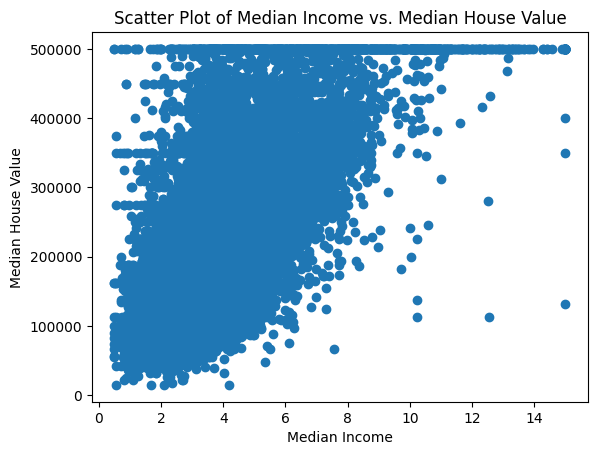

In [ ]:
# Write your code for 5.1. here
plt.scatter(df['median_income'], df['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.show()


In [ ]:
# Write your code for 5.2 here
pearson_correlation = df['median_income'].corr(df['median_house_value'])
pearson_correlation

0.688075207958548

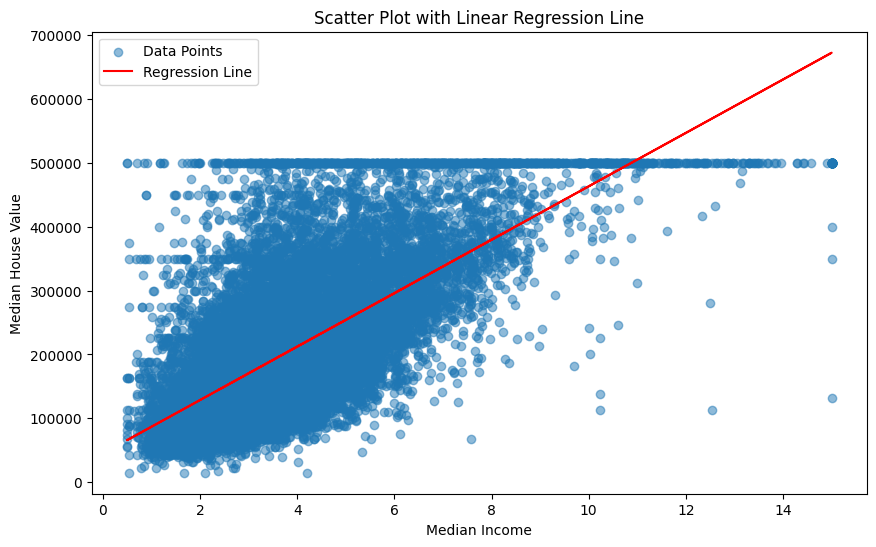

In [ ]:
# Write your answer to 5.3 here

# Fit a simple linear regression to the data
slope = pearson_correlation * (df['median_house_value'].std() / df['median_income'].std())
intercept = df['median_house_value'].mean() - slope * df['median_income'].mean()

# Predicted values for regression line
y_regression = slope * df['median_income'] + intercept


# Plot it here
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5, label='Data Points')
plt.plot(df['median_income'], y_regression, color='red', label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()
plt.show()

### **Question 6: Multiple Linear Regression**

* Assuming `total_rooms` and `total_bedrooms` are strong predictors for `median_house_value`, the following fits a multiple linear regression model, using just these two predictors. Compare its performance with the model results (MAE) from the previous questions.

* Comment on the importance of feature selection in linear regression. Do these two features yield useful results?


In [ ]:
# Extracting the required features
X_rooms_bedrooms = df[['total_rooms', 'total_bedrooms']].values

# Add a bias
X_rooms_bedrooms_bias = np.c_[np.ones(X_rooms_bedrooms.shape[0]), X_rooms_bedrooms]

# Compute the coefficients using the normal equation for this new model
theta_rooms_bedrooms = np.linalg.inv(X_rooms_bedrooms_bias.T.dot(X_rooms_bedrooms_bias)).dot(X_rooms_bedrooms_bias.T).dot(df['median_house_value'])

# Predict using the model
y_pred_rooms_bedrooms = X_rooms_bedrooms_bias.dot(theta_rooms_bedrooms)

# Compute the MAE for this model
mae_rooms_bedrooms = np.mean(np.abs(y_pred_rooms_bedrooms - df['median_house_value']))

theta_rooms_bedrooms, mae_rooms_bedrooms

(array([ 1.98182105e+05,  3.33121322e+01, -1.47115650e+02]), 87881.45255914917)

### **Run and review the output of the cell below and comment on the results**

In [ ]:
output_data = ([ 1.98182105e+05,  3.33121322e+01, -1.47115650e+02], 87881.45255914917)

# Extracting the values
coefficients, performance = output_data

# Converting to human readable format
readable_output = """
Coefficients:
Intercept (Bias Term): ${:,.2f}
Coefficient for total_rooms: ${:,.2f}
Coefficient for total_bedrooms: ${:,.2f}
Model Performance (MAE): ${:,.2f}
""".format(coefficients[0], coefficients[1], coefficients[2], performance)

print(readable_output)


Coefficients:
Intercept (Bias Term): $198,182.11
Coefficient for total_rooms: $33.31
Coefficient for total_bedrooms: $-147.12
Model Performance (MAE): $87,881.45



In [ ]:
# TODO: Write your comments about the above results here, compare the MAE from the previous linear regression model.

#### **Question 8: Training a simple regression model with Scikit Learn**

* Initialize a linear regression model from scikit-learn and `fit` X, y

In [ ]:
from sklearn.linear_model import LinearRegression

# Write your code here

simple_regressor = LinearRegression()
simple_regressor.fit(X, df['median_house_value'])
simple_regressor.coef_, simple_regressor.intercept_

(array([-4.26216988e+04, -4.24794502e+04,  1.14447861e+03, -6.68056553e+00,
         8.24636108e+01, -3.98332646e+01,  7.81123472e+01,  3.97716181e+04]),
 -3571491.5458863457)